# Investigating NICS Firearm Background Checks with FBI Gun Data
### Table of Contents
    Introduction
    Data Wrangling
    Data Cleaning
    Exploratory Data Analysis
    Conclusions
    Source Index

# Introduction

This project is part of the Data Analysis Nano-Degree program offered by Udacity Google. For this project, I chose to use the data from the FBI's National Instant Criminal Background Check System, which is used by gun shops to determine if a future buyer is eligible to buy firearms or explosives. The data consists of two data sets: NICS data that provides the number of background checks from FBI uopn any firearm purchases, and CENSUS DATA that provides demographic and socio-economic data related variables. Such data is very useful in preventing crime and protecting people from harm by not letting firearms to fall in the arms of criminals. It also offers valuable insights such as: spikes in firearms sales over specific periods in time( e.g protests ). The NICS data set for this analysis comes from GitHub and can be accessed here: NICS Data. This data set is supplemented with state level data from census.org that can be accessed here: census data. 

#### A few things to note before we get started: 

##### A. Firearm Background Checks Do Not Equal Sales
##### B. States cannot be directly compared

This analysis will try to explore the following questions:

  1. What is the overall trend over time of firearms purchases?       
  2. Which states have had the highest growth in firearms registrations?

In the PDF files the FBI provides, there is an important note:

These statistics represent the number of firearm background checks initiated through the NICS They do not represent the number of firearms sold Based on varying state laws and purchase scenarios, a one-to-one correlation cannot be made between a firearm background check and a firearm sale

Even though a one-to-one correlation cannot be made between a check and a sale, some organizations have estimated gun sales with this data. For example, the New York Times used a method suggested in the Small Arms Survey by Jurgen Brauer, a professor at Georgia Regents University. Long gun and handgun checks were counted as 1.1 sales, and multiple-gun checks were counted as two sales. Permit and other types of checks were omitted. The mulitplier used in the survey were based on interviews Mr. Brauer had with gun shop owners.

So background checks do not equal sales, but you can have a grasp of what gun sales are by visualizing this data.

States cannot be directly compared
In the visualization section, you will see statistics by state in some of the graphs. When looking at these, keep in mind that even though you can estimate gun sales using the NICS background check data, state laws for firearms differ from each other all across the nation. Even knowing this, the statistics between each state were still very interesting to learn about.


# Data Wrangling
## The Gun Data
The data used to explore the firearm background checks can be downloaded from a BuzzFeed News GitHub repository here.

The code in this GitHub repository downloads that PDF, parses it, and produces a spreadsheet/CSV of the data. Click here to download the data, which currently covers November 1998 – February 2018.

## The Census Data
The population numbers come from the the United States Census government website here. This data has annual estimates of the resident population for the U.S. from April 1, 2010 to July 1, 2017.

While exploring this data, I realized that I needed numbers for children under 18 within each state. As you'll see in the visualization, this was used to calculate how many people were of age to recieve a background check while buying a gun. That number was then used to calculate the percentage of checks compared to the population of that state.

#### Let's explore.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the gun data 
df_gunData = pd.read_csv('gun_data2.csv')
df_gunData.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [3]:
#To check for the last few rows of the gun data set
df_gunData.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


In [4]:
#To check for missing values and count them 
pd.isnull(df_gunData).sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

From the above we can see the amount of missing values we have in our gun data 

In [7]:
df_gunData.shape

(12485, 27)

From the above we can see the number of rows and columns in our dataset 

In [5]:
df_gunData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [9]:
#To check for duplicates in the gun dataset
sum(df_gunData.duplicated())

0

In [6]:
df_gunData.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


 The wrangling steps used on the gun dataset will also be employed to work on the census dataset 

In [63]:
#Loading the census data
df_census = pd.read_csv('U.S. Census Data.csv')
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


The above shows us the first few rows of the census dataset after loading it into the workspace 

In [64]:
df_census.tail()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From looking at the tail of the census dataset we can already see that there are a lot of missing value 

In [12]:
df_census.shape

(85, 52)

In [13]:
pd.isnull(df_census).sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [65]:
df_census.iloc[64:]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
64,FIPS Code,NaN,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NOTE: FIPS Code values are enclosed in quotes ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Value Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,1,Includes data not distributed by county.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Fact Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,(a),Includes persons reporting only one race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,(b),"Hispanics may be of any race, so also are incl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

# Data Cleaning 

In this part of the report I will remove and fix the duplicates and incomplete data within both data sets:

     - filling in missing values with mean in NICS data set 
     - removing duplicates and rows containing Nan values in Census data set
     - removing Fact Note column in Census data set, as it isn't necessary for the analysis
     - transposing the census data to have the data appear in the way I want it for my visualization

In the next cell I will use the fillna method to replace the missing values in NICS data set.

In [66]:
# replacing missing values

df_gunData.fillna(df_gunData.mean(), inplace = True, axis = 0)

C:\Users\Vian\AppData\Local\Temp/ipykernel_11224/1980549993.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_gunData.fillna(df_gunData.mean(), inplace = True, axis = 0)


In [19]:
# confirming there are no missing data 
pd.isnull(df_gunData).sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

In [67]:
# dropping Fact None column
df_census.drop('Fact Note', axis = 1, inplace= True)

The 'Fact Note' column is not useful in this analysis so I dropped it

In [68]:
df_census.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


This confirms that the 'Fact Note' column was dropped successfully

In [69]:
# dropping rows 
df_census = df_census[:64]

In [70]:
#converting al the state to float in the census dataset 

states=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',  
        'Hawaii', 'Idaho', 'Illinois','Indiana', 'Iowa', 'Kansas', 
        'Kentucky', 'Louisiana', 'Maine','Maryland', 'Massachusetts', 
        'Michigan','Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon','Pennsylvania', 
        'Rhode Island', 'South Carolina','South Dakota', 'Tennessee', 'Texas', 'Utah', 
        'Vermont','Virginia', 'Washington', 'West Virginia','Wisconsin', 'Wyoming']
for state in states:
    df_census[state].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
    df_census[state]=pd.to_numeric(df_census[state], downcast='float', errors='ignore')

In [71]:
df_census.dtypes

Fact               object
Alabama           float32
Alaska            float32
Arizona           float32
Arkansas          float32
California        float32
Colorado          float32
Connecticut       float32
Delaware          float32
Florida           float32
Georgia           float32
Hawaii            float32
Idaho             float32
Illinois          float32
Indiana           float32
Iowa              float32
Kansas            float32
Kentucky          float32
Louisiana         float32
Maine             float32
Maryland          float32
Massachusetts     float32
Michigan          float32
Minnesota         float32
Mississippi       float32
Missouri          float32
Montana           float32
Nebraska          float32
Nevada            float32
New Hampshire     float32
New Jersey        float32
New Mexico        float32
New York          float32
North Carolina    float32
North Dakota      float32
Ohio              float32
Oklahoma          float32
Oregon            float32
Pennsylvania

In [72]:
# setting the fact column to become the default index and renaming the new dataframe 

df_census.set_index('Fact',inplace = True)
census = df_census.T.reset_index()

In [73]:
census

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
0,Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,...,322025.0,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,944.0,5064533.0
1,Alaska,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,1040.0,...,55521.0,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,12.0,57064096.0
2,Arizona,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,2550.0,1690.0,...,451951.0,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,563.0,11359408.0
3,Arkansas,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,2440.0,1630.0,...,198380.0,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,5203548.0
4,California,39250016.0,37254520.0,540.0,37253956.0,630.0,680.0,2320.0,2500.0,1360.0,...,3206958.0,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,2391.0,15577922.0
5,Colorado,5540545.0,5029324.0,1020.0,5029196.0,610.0,680.0,2280.0,2440.0,1340.0,...,480847.0,547352.0,284554.0,194508.0,85849.0,442365.0,51722.0,469524.0,485.0,10364189.0
6,Connecticut,3576452.0,3574114.0,10.0,3574097.0,520.0,570.0,2110.0,2290.0,1610.0,...,272809.0,326693.0,187845.0,106678.0,56113.0,259614.0,31056.0,281182.0,7381.0,484236.0
7,Delaware,952065.0,897936.0,600.0,897934.0,580.0,620.0,2150.0,2290.0,1750.0,...,60734.0,73418.0,38328.0,23964.0,14440.0,54782.0,7206.0,60318.0,4608.0,194854.0
8,Florida,20612440.0,18804592.0,960.0,18801310.0,550.0,570.0,2010.0,2130.0,1990.0,...,2040339.0,2100187.0,1084885.0,807817.0,926112.0,1121749.0,185756.0,1846686.0,3506.0,5362476.0
9,Georgia,10310371.0,9688680.0,640.0,9687653.0,640.0,710.0,2440.0,2570.0,1310.0,...,870897.0,929864.0,480578.0,376506.0,371588.0,538893.0,96787.0,800585.0,1684.0,5751349.0


In [74]:
census.rename(columns={'index':'state'},inplace = True)

In [75]:
census.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
0,Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,...,322025.0,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,944.0,5064533.0
1,Alaska,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,1040.0,...,55521.0,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,12.0,57064096.0
2,Arizona,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,2550.0,1690.0,...,451951.0,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,563.0,11359408.0
3,Arkansas,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,2440.0,1630.0,...,198380.0,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,5203548.0
4,California,39250016.0,37254520.0,540.0,37253956.0,630.0,680.0,2320.0,2500.0,1360.0,...,3206958.0,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,2391.0,15577922.0


I renamed the 'Index' column as 'state' and then checked to confirm it was renamed successfully

# Exploratory Data Analysis

## Question 1

   ##### What is the overal trend over time of firearm purchases ?

In [77]:
# plotting firearm purchases trend over time 
firearm_purchases =  pd.pivot_table(data = df_gunData, index = 'month', columns= 'state', values= 'totals')
firearm_purchases =  firearm_purchases.reset_index()
firearm_purchases['total'] = firearm_purchases.iloc[:,1:].sum(axis = 1)
firearm_purchases.head()

state,month,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,total
0,1998-11,1062,145,379,589,2101,622,80,55,0,...,2794,267,59,0,24,361,408,241,107,21176
1,1998-12,35506,3840,17074,21163,65344,23176,6790,2080,0,...,79605,10415,2057,0,25170,11641,13786,15201,3379,870722
2,1999-01,18049,2278,12859,11953,56953,19503,6265,1128,1,...,50992,5055,1043,0,14009,8695,8260,7780,2180,585974
3,1999-02,20583,2413,14546,15348,57471,22239,8069,1077,3,...,55148,5933,1668,0,16053,9383,11206,10578,2643,690215
4,1999-03,19424,3206,14992,13720,68327,17287,7877,1314,2,...,54096,6021,1941,0,17193,10551,10867,14891,2776,741687


C:\Users\Vian\AppData\Local\Temp/ipykernel_11224/2970427690.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  tick_placement = pd.np.arange(2, len(totals), 12)
C:\Users\Vian\AppData\Local\Temp/ipykernel_11224/2970427690.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([ "{0:,.0f}".format(y) for y in ax.get_yticks() ], fontsize=12);


Text(0.5, 0, '')

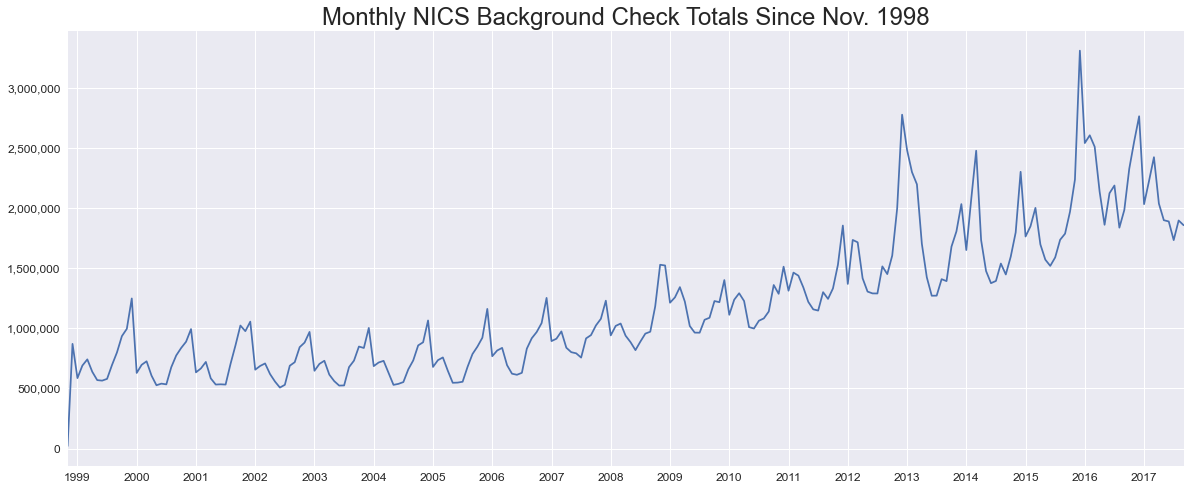

In [82]:
# sum the totals by month
totals = df_gunData.groupby("month")["totals"].sum()

# plot graph
tick_placement = pd.np.arange(2, len(totals), 12)
plt.style.use('seaborn')
ax = totals.plot(figsize=(20,8))


ax.set_title("Monthly NICS Background Check Totals Since Nov. 1998", fontsize=24)
ax.set_yticklabels([ "{0:,.0f}".format(y) for y in ax.get_yticks() ], fontsize=12);
plt.setp(ax.get_xticklabels(), rotation=0, fontsize=12)
ax.set_xticks(tick_placement)
ax.set_xticklabels([ totals.index[i].split("-")[0] for i in tick_placement ])
ax.set_xlim(0, len(totals) - 1)
ax.set_xlabel("")

The visualization above shows that gun purchase has been increasing over the years since 1999

## Question 2

   #### Which states have had the highest growth in gun registrations?

In [86]:
# converting the month data type from str to datetime object and extracting the year and month

df_gunData['year'] = pd.to_datetime(df_gunData['month']).dt.strftime('%Y')
df_gunData['months']= pd.to_datetime(df_gunData['month']).dt.strftime('%m')
df_gunData.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017,09
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,2017,09
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,2017,09
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,2017,09
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,2017,09


In [88]:
# dropping the month column
df_gunData.drop('month', axis = 1, inplace = True)


In [89]:
# creating a small dataset
df_gun = df_gunData[['year', 'months','state','totals']]


In [90]:
df_gun.head()

,year,months,state,totals
0,2017,09,Alabama,32019
1,2017,09,Alaska,6303
2,2017,09,Arizona,28394
3,2017,09,Arkansas,17747
4,2017,09,California,123506


In [92]:
# creating subsets data for 2021 and 1998 
df_gun_2017 = df_gun.query('year=="2017"')
df_gun_2017

,year,months,state,totals
0,2017,09,Alabama,32019
1,2017,09,Alaska,6303
2,2017,09,Arizona,28394
3,2017,09,Arkansas,17747
4,2017,09,California,123506
...,...,...,...,...
490,2017,01,Virginia,37369
491,2017,01,Washington,46027
492,2017,01,West Virginia,15772
493,2017,01,Wisconsin,46775


In [93]:
df_gun_1998 = df_gun.query('year=="1998"')
df_gun_1998

,year,months,state,totals
12375,1998,12,Alabama,35506
12376,1998,12,Alaska,3840
12377,1998,12,Arizona,17074
12378,1998,12,Arkansas,21163
12379,1998,12,California,65344
...,...,...,...,...
12480,1998,11,Virginia,24
12481,1998,11,Washington,361
12482,1998,11,West Virginia,408
12483,1998,11,Wisconsin,241


Below I groupby state and gun totals for 2017 and 1998 and renaming the colon totals to represent the totals of firearm check 2017 and 1998


In [97]:
guntotal_2017 = df_gun_2017.groupby(['state'])['totals'].sum().reset_index()
guntotal_2017.head()

,state,totals
0,Alabama,336763
1,Alaska,56902
2,Arizona,279553
3,Arkansas,161694
4,California,1167528


In [98]:
guntotal_2017.rename({'totals':'2017_totals'}, axis = 1, inplace = True)


In [99]:
guntotal_1998 = df_gun_1998.groupby(['state'])['totals'].sum().reset_index()
guntotal_1998.tail()

,state,totals
50,Virginia,25194
51,Washington,12002
52,West Virginia,14194
53,Wisconsin,15442
54,Wyoming,3486


In [100]:
guntotal_1998.rename({'totals':'1998_totals'}, axis =1 , inplace = True)
guntotal_1998.tail()

,state,1998_totals
50,Virginia,25194
51,Washington,12002
52,West Virginia,14194
53,Wisconsin,15442
54,Wyoming,3486


In [101]:
# merging the two datasets 
gunstotal = guntotal_2017.merge(guntotal_1998, on = 'state', how = 'inner')
gunstotal

,state,2017_totals,1998_totals
0,Alabama,336763,36568
1,Alaska,56902,3985
2,Arizona,279553,17453
3,Arkansas,161694,21752
4,California,1167528,67445
5,Colorado,345559,23798
6,Connecticut,138789,6870
7,Delaware,36826,2135
8,District of Columbia,754,0
9,Florida,912765,32341


In [102]:
# finding the highest growth

gunstotal['growth rate'] = (gunstotal['2017_totals'] / gunstotal['1998_totals']) -1
gunstotal = gunstotal.sort_values(['growth rate'], ascending = False)
gunstotal.head()

,state,2017_totals,1998_totals,growth rate
21,Mariana Islands,106,0,inf
8,District of Columbia,754,0,inf
49,Virgin Islands,925,0,inf
11,Guam,1372,9,151.444444
18,Kentucky,3417976,31869,106.250808


In [103]:
# dropping the rows with states values that have no growth value
gunstotal = gunstotal.drop(labels = [8,21,49], axis = 0)
gunstotal.head(10)

,state,2017_totals,1998_totals,growth rate
11,Guam,1372,9,151.444444
18,Kentucky,3417976,31869,106.250808
23,Massachusetts,154161,1443,105.833680
10,Georgia,378921,3819,98.219953
25,Minnesota,529302,12116,42.686200
31,New Hampshire,95057,2442,37.925880
51,Washington,419522,12002,33.954341
43,South Carolina,295532,9565,29.897229
9,Florida,912765,32341,27.223153
14,Illinois,1163945,41477,27.062420


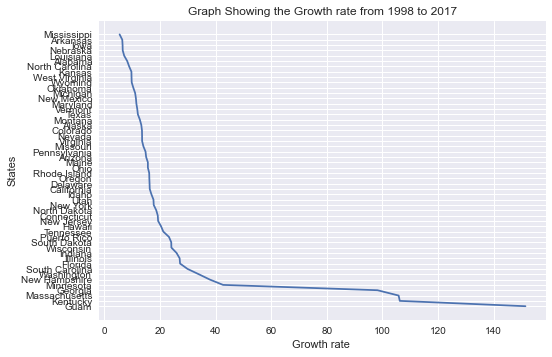

In [108]:
x = gunstotal['growth rate']
# corresponding y axis values
y = gunstotal['state']
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('Growth rate ')
# naming the y axis
plt.ylabel('States')
  
# giving a title to my graph
plt.title('Graph Showing the Growth rate from 1998 to 2017')
  
# function to show the plot
plt.show()

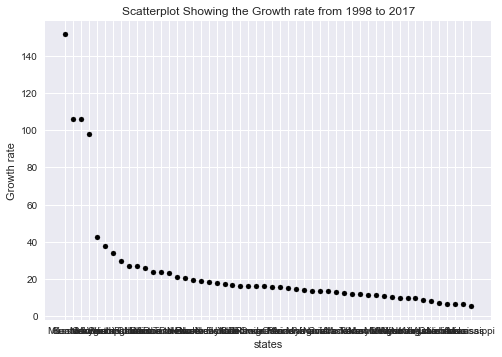

In [119]:

import matplotlib.pyplot as plt
  
# x-axis values
x = gunstotal['state']
# y-axis values
y = gunstotal['growth rate']
  
# plotting points as a scatter plot
plt.scatter(x, y, label= "dots", color= "black", 
            marker= ".", s=100)
  
# x-axis label
plt.xlabel('states')
# frequency label
plt.ylabel('Growth rate')
# plot title
plt.title('Scatterplot Showing the Growth rate from 1998 to 2017')
# showing legend
#plt.legend()
  
# function to show the plot
plt.show()

# Conclusion



## From Question 1 

We see from the visualization that the gun trend was stable from 1998 up until 2005, then it began steadily increasing over the years up until 2017 which is at the highest 

## From Question 2 

We notice that Guam has the highest growth rate in terms of guns purchased followed by Kentucky and then Massachusetts. Both the scatterplot and the graph show Guam being the state with the most growth rate over the specified period of 1998-2017 

# Source Index

1. https://matplotlib.org/stable/tutorials/introductory/pyplot.html
2. https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/
3. https://github.com/joannarippel/
4. https://github.com/kennethacurtis/fbi_gun_data
5. https://stackoverflow.com/questions/42381639/how-do-i-transpose-dataframe-in-pandas-without-index
6. https://stackoverflow.com/questions/58286715/find-highest-growth-using-python-pandas